# Loading images
Here we are going to resample image to illustrate the anisotropic thickness computation.
Note that the spacing parameter can also be passed to the simple `compute_thickness` function illustrated in the other notebook.

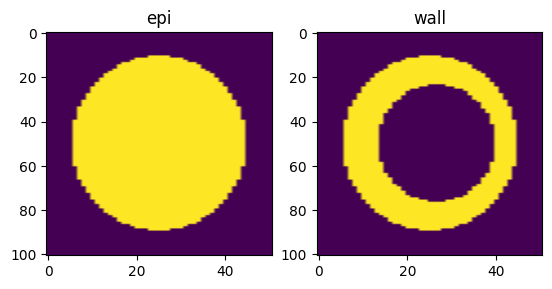

In [1]:
from matplotlib import pyplot as plt
from skimage.io import imread

epi = imread("epi.tif")[:, :, ::2].astype(bool)
wall = imread("wall.tif")[:, :, ::2].astype(bool)
s = 22

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(epi[s])
axarr[0].set_title("epi")
axarr[0].set_aspect(0.5)
axarr[1].imshow(wall[s])
axarr[1].set_title("wall")
axarr[1].set_aspect(0.5)
plt.show()

# Solving Laplacian

INFO:pyezzi.thickness:Solving Laplacian...
DEBUG:pyezzi.thickness:Laplacian: 473 iterations, max_error = 9.974502046490163e-07
DEBUG:pyezzi.thickness:Computing tangent vector field
DEBUG:pyezzi.misc:_get_gradients took 0.004917474929243326 seconds
DEBUG:pyezzi.misc:solve_laplacian took 0.9120664210058749 seconds
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f9cdc410710>


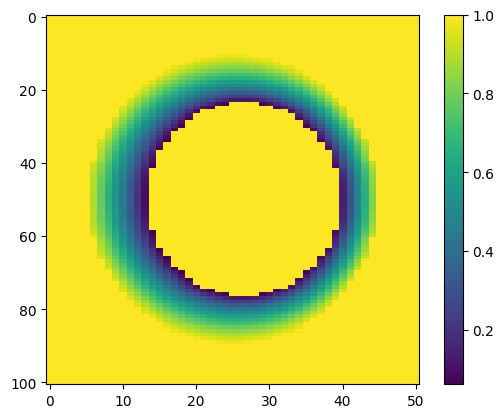

In [10]:
import logging

import numpy as np

from pyezzi import Domain, ThicknessSolver

logging.basicConfig(level=logging.DEBUG)

labeled_image = np.zeros_like(epi, np.uint8)
labeled_image[epi] = 1
labeled_image[wall] = 2

f, ax = plt.subplots(1)
solver = ThicknessSolver(Domain(labeled_image == 1, wall, (2, 1, 1)))
solver.solve_laplacian()
plt.imshow(solver.laplace_grid[s])
ax.set_aspect(0.5)
plt.colorbar()
plt.show()

# Computing thickness
Using iterative relaxation

INFO:pyezzi.thickness:Computing L0 and L1...
DEBUG:pyezzi.thickness:Thickness computation: 31 iterations, max_error = 2.0805466873751432e-07
DEBUG:pyezzi.misc:solve_thickness took 0.13680349895730615 seconds
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f9cdc2ea060>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f9cdc2eacc0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f9cdc2eb140>


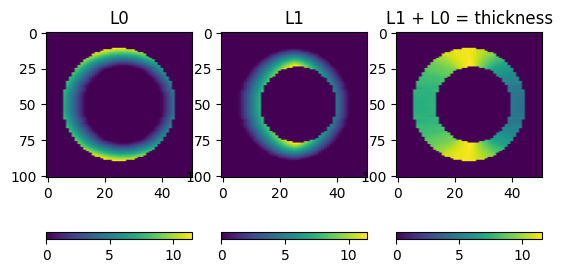

In [13]:
solver.solve_thickness()
fig, axes = plt.subplots(ncols=3)
for img, title, ax in zip(
    (solver.L0, solver.L1, solver.result),
    ("L0", "L1", "L1 + L0 = thickness"),
    axes,
):
    im = ax.imshow(img[s])
    ax.set_aspect(0.5)
    ax.set_title(title)
    plt.colorbar(mappable=im, ax=ax, orientation="horizontal")

max = 22.684480085020205, moy = 8.695907715646834, min = 2.6666667746653347, std = 3.5678783000348764


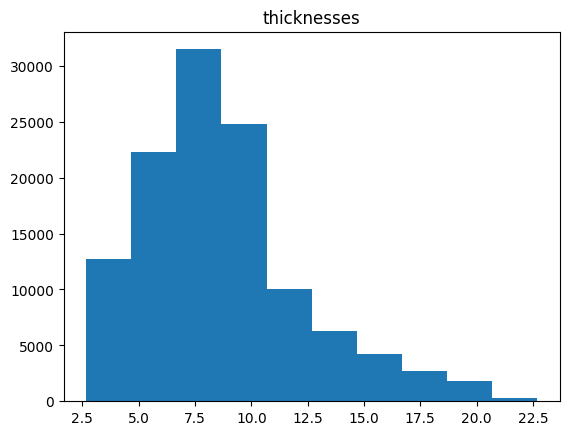

In [14]:
thickness_values = np.nan_to_num(solver.result[wall.astype(bool)])

print(
    "max = {}, moy = {}, min = {}, std = {}".format(
        thickness_values.max(),
        thickness_values.mean(),
        thickness_values.min(),
        thickness_values.std(),
    )
)
plt.hist(thickness_values)
plt.title("thicknesses")
plt.show()